In [1]:
# Import our dependencies

import pandas as pd


#  Import and read the charity_data.csv.
import pandas as pd 
track_df = pd.read_csv("C:\\Users\\rushi\\Downloads\\spotify\\abedasalsabil spotify main cleaning%20\\cleaning\\Resources\\clean_May_tracks.csv")

In [2]:
track_df.head(5)

,track.name,album_name,album_type,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist
0,#Sarkanbaltsarkanais,#Sarkanbaltsarkanais,single,38.0,0.738,0.785,11,-5.003,0.1040,0.0608,0.00000,0.403,0.6260,110.118,Bermudu Divstūris
1,'Til We Meet Again,MY WORLD - The 3rd Mini Album,single,63.0,0.474,0.857,5,-2.577,0.0571,0.1340,0.00000,0.113,0.5520,155.710,aespa
2,00:00,00:00,single,60.0,0.563,0.572,4,-8.769,0.1250,0.6400,0.00227,0.100,0.3920,95.013,Lartiste
3,0321,0321,single,67.0,0.658,0.417,2,-6.485,0.0366,0.6250,0.00000,0.132,0.0748,171.974,space x
4,085 - Ao Vivo,Pode Crê (Ao Vivo),album,83.0,0.850,0.655,2,-2.891,0.0298,0.2110,0.00000,0.952,0.7970,106.031,MC Rogerinho


In [3]:
# finding the number of songs sung by each Artist
df = track_df.groupby(track_df['artist']).size()
df.head()
# Convert the series to a DataFrame
artist_songs_df = df.reset_index()
# Rename the columns
artist_songs_df.columns = ['Artist', 'Song_Count']


# Feature Engineering -
Since our goal is to be able to identify which tracks will be popular, we need to feature engineer a new column by binarizing the popularity column. To be able to do this, we need to decide on a cut-off point of popularity score which if a song stays above this cut-off point it will be considered "popular" and if it stays below it will be considered "not popular". We can start off by taking a look at the distribution of the popularity score distribution.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

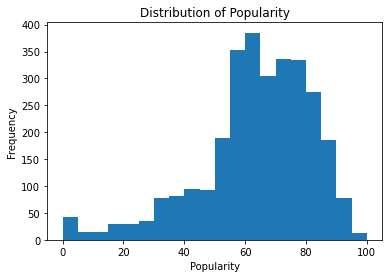

Mean Popularity: 63.282241728561786
Median Popularity: 65.0
75th Percentile Popularity: 77.0


In [5]:
# Distribution of popularity

import matplotlib.pyplot as plt

# Plot a histogram of the 'popularity' feature
plt.hist(track_df['popularity'], bins=20)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.show()

# Calculate summary statistics
popularity_mean = track_df['popularity'].mean()
popularity_median = track_df['popularity'].median()
popularity_percentile = track_df['popularity'].quantile(0.75)

print("Mean Popularity:", popularity_mean)
print("Median Popularity:", popularity_median)
print("75th Percentile Popularity:", popularity_percentile)

In [6]:
#creating is_popular column with our cutoff point
track_df['is_popular']=(track_df['popularity']>=65).astype('int')
track_df.head()

,track.name,album_name,album_type,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,is_popular
0,#Sarkanbaltsarkanais,#Sarkanbaltsarkanais,single,38.0,0.738,0.785,11,-5.003,0.1040,0.0608,0.00000,0.403,0.6260,110.118,Bermudu Divstūris,0
1,'Til We Meet Again,MY WORLD - The 3rd Mini Album,single,63.0,0.474,0.857,5,-2.577,0.0571,0.1340,0.00000,0.113,0.5520,155.710,aespa,0
2,00:00,00:00,single,60.0,0.563,0.572,4,-8.769,0.1250,0.6400,0.00227,0.100,0.3920,95.013,Lartiste,0
3,0321,0321,single,67.0,0.658,0.417,2,-6.485,0.0366,0.6250,0.00000,0.132,0.0748,171.974,space x,1
4,085 - Ao Vivo,Pode Crê (Ao Vivo),album,83.0,0.850,0.655,2,-2.891,0.0298,0.2110,0.00000,0.952,0.7970,106.031,MC Rogerinho,1


In [7]:
#dropping popularity score column since we will not be using it
track_df.drop(['popularity'], axis=1, inplace=True)
track_df.head()

,track.name,album_name,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,is_popular
0,#Sarkanbaltsarkanais,#Sarkanbaltsarkanais,single,0.738,0.785,11,-5.003,0.1040,0.0608,0.00000,0.403,0.6260,110.118,Bermudu Divstūris,0
1,'Til We Meet Again,MY WORLD - The 3rd Mini Album,single,0.474,0.857,5,-2.577,0.0571,0.1340,0.00000,0.113,0.5520,155.710,aespa,0
2,00:00,00:00,single,0.563,0.572,4,-8.769,0.1250,0.6400,0.00227,0.100,0.3920,95.013,Lartiste,0
3,0321,0321,single,0.658,0.417,2,-6.485,0.0366,0.6250,0.00000,0.132,0.0748,171.974,space x,1
4,085 - Ao Vivo,Pode Crê (Ao Vivo),album,0.850,0.655,2,-2.891,0.0298,0.2110,0.00000,0.952,0.7970,106.031,MC Rogerinho,1


In [8]:
track_df["is_popular"].value_counts()

1    1525
0    1437
Name: is_popular, dtype: int64

# Logistic Regression Model with the Original Data

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

In [10]:
#Split the data into features (X) and target (y)
y = track_df[['is_popular']]
X = track_df[['speechiness','acousticness','liveness','valence','energy','loudness']]

In [11]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
x_train,x_test,y_train,y_test= train_test_split(X,y)

In [12]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(x_train, y_train)

C:\Users\rushi\anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# Make a prediction using the testing data
testing_predictions = lr_model.predict(x_test)

In [14]:
# Print the balanced_accuracy score of the model
print(f"Training Data Score: {lr_model.score(x_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(x_test, y_test)}")

from sklearn.metrics import accuracy_score
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, testing_predictions)}")

Training Data Score: 0.6118865375956776
Testing Data Score: 0.5910931174089069
Balanced Accuracy Score: 0.5893799183911396


In [15]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix

testing_matrix = confusion_matrix(y_test, testing_predictions)
print(testing_matrix)

[[173 192]
 [111 265]]


In [16]:
# Print the classification report for the model
testing_report = classification_report(y_test, testing_predictions)

print(testing_report)

              precision    recall  f1-score   support

           0       0.61      0.47      0.53       365
           1       0.58      0.70      0.64       376

    accuracy                           0.59       741
   macro avg       0.59      0.59      0.58       741
weighted avg       0.59      0.59      0.59       741



For the "0" label (NOT POPULAR), the precision is 0.61, indicating that the model  predicts not popular track with a precision of 61%. For the "1" label (popular), the precision is 0.58, meaning that when the model predicts popular track , it is correct around 58% of the time.

For the "0" label (Not popular), the recall is 0.47, . For the "1" label (POPULAR), the recall is 0.70, meaning that the model captures approximately 70% of the actual popular track.

Overall, the logistic regression model demonstrates  predictive performance for both the "0" and "1" labels.

# Predict a Logistic Regression Model with Resampled Training Data

In [17]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ROS = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
x_resampled, y_resampled= ROS.fit_resample(x_train, y_train)

In [18]:
# Count the distinct values of the resampled labels data
y_resampled.value_counts()

is_popular
0             1149
1             1149
dtype: int64

In [19]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
from sklearn.linear_model import LogisticRegression
ros_model = LogisticRegression(solver='lbfgs', random_state=1)


# Fit the model using the resampled training data
ros_model.fit(x_resampled, y_resampled)


# Make a prediction using the testing data
y_prediction = ros_model.predict(x_test)

C:\Users\rushi\anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# Print the balanced_accuracy score of the model 
print(f"Training Data Score: {ros_model.score(x_train, y_train)}")
print(f"Testing Data Score: {ros_model.score(x_test, y_test)}")

from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_prediction)}")

Training Data Score: 0.6190904997748762
Testing Data Score: 0.5951417004048583
Balanced Accuracy Score: 0.5940104925677645


In [21]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
ros_testing_matrix = confusion_matrix(y_test, y_prediction)
print(ros_testing_matrix)

[[189 176]
 [124 252]]


In [22]:
# Print the classification report for the model
ros_testing_report = classification_report(y_test, y_prediction)

print(ros_testing_report)

              precision    recall  f1-score   support

           0       0.60      0.52      0.56       365
           1       0.59      0.67      0.63       376

    accuracy                           0.60       741
   macro avg       0.60      0.59      0.59       741
weighted avg       0.60      0.60      0.59       741



# NeuralNetwork

In [23]:
#Split the data into features (X) and target (y)
y = track_df[['is_popular']]
X = track_df[['speechiness','acousticness','liveness','valence','energy','loudness']]

In [24]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [25]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 63        
                                                                 
 dense_1 (Dense)             (None, 18)                180       
                                                                 
 dense_2 (Dense)             (None, 1)                 19        
                                                                 
Total params: 262
Trainable params: 262
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 1ms/step - loss: 0.7161 - accuracy: 0.5079
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5398
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5552
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5718
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5795
Epoch 6/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.6015
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.5970
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.6051
Epoch 9/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.6011
Epoch 10/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6644 - accuracy: 0.6024
Epoch 11/

70/70 [==============================] - 0s 1ms/step - loss: 0.6385 - accuracy: 0.6371
Epoch 84/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.6362
Epoch 85/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6386 - accuracy: 0.6394
Epoch 86/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.6403
Epoch 87/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.6376
Epoch 88/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.6348
Epoch 89/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.6376
Epoch 90/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6370 - accuracy: 0.6421
Epoch 91/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6374 - accuracy: 0.6416
Epoch 92/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.6376
Epoch 93/100


In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

24/24 - 0s - loss: 0.6481 - accuracy: 0.6046 - 244ms/epoch - 10ms/step
Loss: 0.6481249332427979, Accuracy: 0.6045883893966675


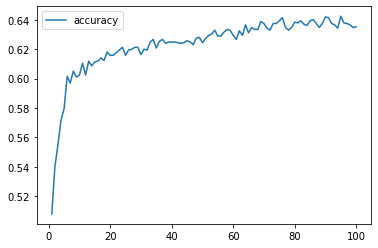

In [30]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

cutoff = 65 ,layer1 = 9 : activation function = relu layer2 = 18 : activation function = relu

Loss: 0.654283881187439, Accuracy: 0.6126855611801147

A loss value of 65 indicates that the model can be further optimized. The accuracy percent shows that 61% of the model's predicted values align with the true values in the original dataset.

# Adding hidden layer

In [31]:


# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 27

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))





# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 63        
                                                                 
 dense_4 (Dense)             (None, 18)                180       
                                                                 
 dense_5 (Dense)             (None, 27)                513       
                                                                 
 dense_6 (Dense)             (None, 1)                 28        
                                                                 
Total params: 784
Trainable params: 784
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5254
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5763
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5966
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6060
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.6029
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.6119
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.6155
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6110
Epoch 9/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6213
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6150
Epoch 11/

70/70 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.6511
Epoch 84/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6184 - accuracy: 0.6533
Epoch 85/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6172 - accuracy: 0.6524
Epoch 86/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6165 - accuracy: 0.6515
Epoch 87/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.6488
Epoch 88/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6173 - accuracy: 0.6502
Epoch 89/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6159 - accuracy: 0.6556
Epoch 90/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6161 - accuracy: 0.6524
Epoch 91/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6154 - accuracy: 0.6511
Epoch 92/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.6547
Epoch 93/100


In [34]:
#Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

24/24 - 0s - loss: 0.6508 - accuracy: 0.6154 - 207ms/epoch - 9ms/step
Loss: 0.6507761478424072, Accuracy: 0.6153846383094788


# Changing activation

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 81


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))




# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 9)                 63        
                                                                 
 dense_8 (Dense)             (None, 18)                180       
                                                                 
 dense_9 (Dense)             (None, 81)                1539      
                                                                 
 dense_10 (Dense)            (None, 1)                 82        
                                                                 
Total params: 1,864
Trainable params: 1,864
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 2ms/step - loss: 0.6750 - accuracy: 0.5745
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.5925
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.5921
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.5952
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6024
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6029
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.5993
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6047
Epoch 9/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6092
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6024
Epoch 11/

70/70 [==============================] - 0s 1ms/step - loss: 0.6408 - accuracy: 0.6263
Epoch 84/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6390 - accuracy: 0.6326
Epoch 85/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6385 - accuracy: 0.6299
Epoch 86/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.6330
Epoch 87/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.6294
Epoch 88/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6376 - accuracy: 0.6367
Epoch 89/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.6258
Epoch 90/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.6317
Epoch 91/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.6380
Epoch 92/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.6285
Epoch 93/100


In [38]:
#Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

24/24 - 0s - loss: 0.6425 - accuracy: 0.6221 - 218ms/epoch - 9ms/step
Loss: 0.6425341367721558, Accuracy: 0.6221322417259216


In [39]:
# Export our model to HDF5 file
nn.save('Model/Model.h5')

# random forest 

In [40]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Update X with the 'loudness' and 'energy' columns
X = track_df[['loudness', 'energy']].values

# Update y with the target variable column
y = track_df['is_popular'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
# Print the accuracies of the three models
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.5750421585160203
